<a href="https://colab.research.google.com/github/thecoderarnav/C115/blob/main/C115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files 
data_to_load = files.upload()

Saving data115_@.csv to data115_@.csv


In [3]:
import pandas as pd 
import plotly.express as px

df = pd.read_csv("data115_@.csv")
score_list  = df ["Score"].tolist()
accepted_list = df ["Accepted"].tolist()


fig = px.scatter(x = score_list, y = accepted_list)
fig.show()

In [4]:
import numpy as np
score_array = np.array(score_list)
accepted_array = np.array ( accepted_list )

m,c = np.polyfit(score_array, accepted_array, 1)

y = []
for x in score_array:
  y_value = m*x + c
  y.append(y_value)

fig = px.scatter(x = score_array , y = accepted_array)
fig.update_layout(shapes = [
                            dict(
                                type = "line", y0 = min(y), y1 = max(y), x0 = min(score_array), x1 = max(score_array)
                            )
])

fig.show()  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



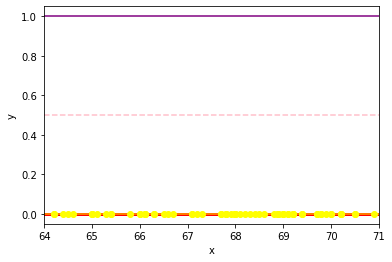

In [15]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
X = np.reshape(score_list, (len(score_list),1))
Y = np.reshape(accepted_list, (len(accepted_list), 1)) 

lr = LogisticRegression()
lr.fit(X,Y)

plt.figure()
plt.scatter(X.ravel(), Y,color = "yellow",zorder = 20)

def model(x):
  return 1/(1+np.exp(-x))
X_test = np.linspace(0,100,200)
chances = model(X_test*lr.coef_+lr.intercept_).ravel()

plt.plot(X_test, chances, color = "red", linewidth = 3 )

plt.axhline(y=0, color = "orange", linestyle = "-")

plt.axhline(y=1, color = "purple", linestyle = "-")

plt.axhline(y=0.5, color = "pink", linestyle = "--")
plt.axvline(x = X_test[165],color = "blue", linestyle = "--" )

plt.ylabel("y")
plt.xlabel("x")
plt.xlim(64, 71)

plt.show()

In [19]:
user_score = float(input("enter your marks heree"))
chances = model(user_score*lr.coef_+lr.intercept_).ravel()[0]

if chances <= 0.01:
  print("Student is not accepted")

elif chances >=1:
  print("Student is accepted")

elif chances >0.5:
  print("Student may not be accepted") 

else:
  print("Student may get accepted")



enter your marks heree99.75
Student is accepted
